# Statistiques

### Préparation des données et insertion dans les dataframe.
Ainsi aue le nettoyage des données (suppression des données redondantes et les données non renseignées) 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import re
import plotly.express as px

data = pd.read_csv(r'./csv/Report_2022.csv')
df_2022 = pd.DataFrame(data)
df_2022 = df_2022.drop_duplicates()
df_2022 = df_2022.dropna()

## Map mondiales des scores globalaux

In [2]:
fig = px.choropleth(df_2022, locations='ISO_Code', color='Global_Score',  hover_name = df_2022.index, hover_data=["Position_2022", "Region"], title='Planisphère des scores globaux')
fig.show()



In [3]:
fig = px.choropleth(df_2022, locations='ISO_Code', color='Situation',  hover_name = df_2022.index, hover_data=["Position_2022", "Region"], title='Situation de la liberté de la presse dans le monde')
fig.show()

## Moyennes des position sur l'année 2022 par région

In [4]:
for i in df_2022['Region'].unique():
    print(i)
    dfi = df_2022[(df_2022.Region == i)]
    print(dfi['Position_2022'].mean())

Asia Pacific
112.5
Europe
50.255319148936174
Arab States
129.44444444444446
Africa
92.37209302325581
South America
82.875
North America
30.5
Middle  East
150.06666666666666
South al America
160.0


 ## "Meilleur" et "pire" pays du classement

In [5]:
df_2022 = df_2022.sort_values(by='Position_2022')
print(df_2022.head(1)) # Norvège
print(df_2022.tail(1)) # Corée du nord

    Country ISO_Code  Region  Position_2022  Position_2021  Global_Score   
121  Norway      NOR  Europe              1              1         92.65  \

     Politic_Score  Economic_Score  Legislative_Score  Social_Score   
121          94.89           90.38              92.23         93.71  \

     Security_Score  Journalist_Killed  Media_Workers_Killed   
121           92.03                  0                     0  \

     Journalist_Imprisoned  Media_Workers_Imprisoned Situation  
121                      0                         0      Good  
         Country ISO_Code        Region  Position_2022  Position_2021   
118  North Korea      PRK  Asia Pacific            180            179  \

     Global_Score  Politic_Score  Economic_Score  Legislative_Score   
118         13.92          22.42             0.0              22.81  \

     Social_Score  Security_Score  Journalist_Killed  Media_Workers_Killed   
118          12.0           12.38                  0                     0  \

## Meilleure et pire progression de la liberté de la presse 

In [6]:
dfprog = df_2022['Position_2021'] - df_2022['Position_2022']
dfprog.add(df_2022['Country'],axis=2)
print(dfprog)
print(dfprog.head())
print(dfprog.tail())

ValueError: No axis named 2 for object type Series

## Pays avec le plus de journalistes tués

Journalistes tués en fonction des pays (les 5 pays où le nombre de journalistes tués en 2022 est le plus élevé) :


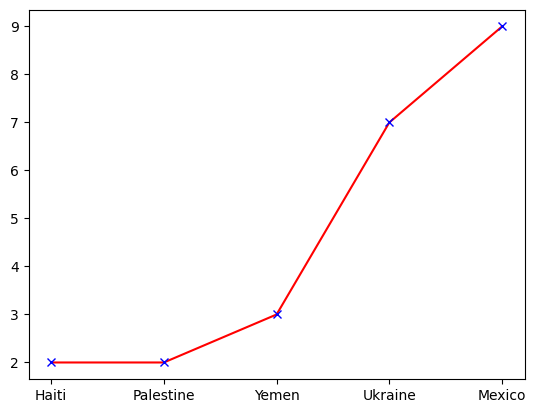

In [7]:
jkilledtop5 = df_2022.sort_values(by=['Journalist_Killed'])
jkilledtop5 = jkilledtop5.tail(5)
print("Journalistes tués en fonction des pays (les 5 pays où le nombre de journalistes tués en 2022 est le plus élevé) :")
plt.figure()
plt.plot(jkilledtop5["Country"],jkilledtop5["Journalist_Killed"],'r')
plt.plot(jkilledtop5["Country"],jkilledtop5["Journalist_Killed"],'bx')
plt.show()

In [ ]:
print(df_2022)